# DICE coefficient for measuring overlap
Checking overlap of the Jacobian and the brain regions using DICE coefficient.

In [5]:
# Importing libraries
import matplotlib.pyplot as plt
%run nifti_tools.ipynb
%run Overlap_functions.ipynb
%matplotlib inline

**Choosing top hits of DICE coefficient to see how much of Jacobian they cover,
and selecting a threshold for it.**

In [2]:
# Loading the comprehensive overlap dataframe
df_path = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/RAG2_neg_comp_overlap_anat.csv'
overlap_df = pd.read_csv(df_path, index_col = 'Unnamed: 0')

# Sorting the dataframe by DICE coeff and resetting the index
sorted_df = overlap_df.sort_values(by=['DICE_neg_jcb_anat'], ascending=False, na_position='last')
sorted_df.reset_index(drop=True, inplace=True)

# Choosing top hits until the overlap with jacobian reaches a threshold
threshold = 0.51
thresh_df = sorted_df[sorted_df['jac_overlap_ratio'].cumsum() < threshold]

print('Last index included to reach an overlap of {} with Jacobian is {}.'\
.format(threshold, thresh_df.shape[0]))

Last index included to reach an overlap of 0.51 with Jacobian is 15.


**Checking overlap of this brain regions group with ISH clusters**

In [8]:
'''
Making a dataframe that has the overlap ratios of brain regions group and clusters,
clusters ranging from 1 to 250.
'''

# Range of number of clusters
n_max = 250
number_range = range(1, n_max+1)

# Creating an array to store overlap ratios
score_arr = np.zeros((n_max, n_max))

# Loading inputs to the function
ant_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/allen_annot200.nii'
ant_list = thresh_df['ant_id']

# Looping over different clusters
for n_clusters in number_range:
    # Inputting path to the cluster file
    cluster_file = '/data/bioprotean/ABA/PCA/clusters/nclusters_fixed'+str(n_clusters)+'.nii'
    
    # Computing the overlap for the cluster
    overlap_list = Overlap_anat_clusters(ant_file, ant_list, cluster_file)
    
    # Adding the overlap list to the array
    score_arr[:n_clusters, n_clusters-1] = np.array(overlap_list)

# Converting the array to a dataframe
output_df = pd.DataFrame(score_arr, columns = [str(i)+'_clusters' for i in number_range])
output_df['cluster_ID'] = range(n_max)
output_df.set_index('cluster_ID', inplace = True)

In [15]:
output_df['9_clusters'].iloc[:20]

cluster_ID
0     0.016899
1     0.051953
2     0.042204
3     0.044316
4     0.422746
5     0.007385
6     0.094539
7     0.194289
8     0.192026
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
Name: 9_clusters, dtype: float64

Maximum ratio is 0.428445049336509 for 9 clusters.



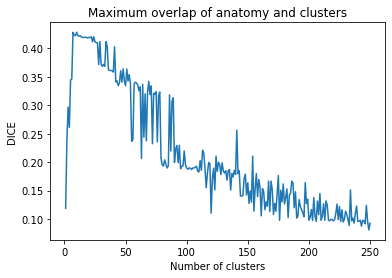

In [10]:
'''
Plotting the highest value in each experiment
'''
# List of max overlap from each column
max_ratio_list = []

# Getting the max value and adding to the list
n_clusters = 250

for i in range(n_clusters):
    max_ratio = output_df.iloc[:,i].max()
    
    max_ratio_list.append(max_ratio)

# Defining x and y
x = range(1, n_clusters+1)
y = max_ratio_list

print('Maximum ratio is {} for {} clusters.\n'.format(max(y), y.index(max(y))))

# Plotting the ratios
plt.plot(x, y)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of clusters")
plt.ylabel("DICE")
plt.title("Maximum overlap of anatomy and clusters")

# Setting the figure size
plt.rcParams["figure.figsize"] = (10,10)

# To load the display window
plt.show()

**We would like to see how many clusters define some good percentage of Jacobian.
<br>We need to check the overlap with brain region for the clusters.**

In [21]:
# Choosing the total number of clusters and clusters to pick
n_clusters = 9
select_n = 3

# Sorting the dataframe to get top n hits of each column
selected_df = output_df.sort_values(by=[str(n_clusters)+'_clusters'], ascending=False, na_position='last')
selected_df.reset_index(inplace=True)

print(selected_df[str(n_clusters)+'_clusters'].head(select_n))

# Getting the cluster id for the top select_n regions
cluster_ids_list = list(selected_df['cluster_ID'].iloc[:select_n])

print('\nCluster IDs are: {}\n'.format(cluster_ids_list))

# Calling the function
jac_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/\
MKO_MWTavg_invjcb_avg_thrsh_1set_qw_masked_neg_ctrst_clust_binary_200.nii'
cluster_file = '/data/bioprotean/ABA/PCA/clusters/nclusters_fixed'+str(n_clusters)+'.nii'

# Selecting the overlap mode
overlap_mode = 'DICE'

overlap_list = Overlap_jac_clusters (jac_file, cluster_file, cluster_bundle = True,\
cluster_bundle_list = cluster_ids_list, mode = overlap_mode, plot = False)

print('Overlap of selected clusters with Jacobian on basis \
of {} is {}.'.format(overlap_mode, overlap_list))

0    0.422746
1    0.194289
2    0.192026
Name: 9_clusters, dtype: float64

Cluster IDs are: [4, 7, 8]

Overlap of selected clusters with Jacobian on basis of DICE is [0.0631550025513208].


# Show these clusters

In [13]:
thresh_df['acronym']

0              "int"
1               "CP"
2              "GPe"
3               "RT"
4              "arb"
5     "fiber tracts"
6              "stc"
7              "VPL"
8               "VL"
9               "PB"
10             "CA3"
11           "CENT2"
12             "GPi"
13         "CUL4, 5"
14             "MOB"
Name: acronym, dtype: object